In [1]:
pip install missingno

     |████████████████████████████████| 215kB 8.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [3]:
data = pd.read_csv('loan.csv')

In [4]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


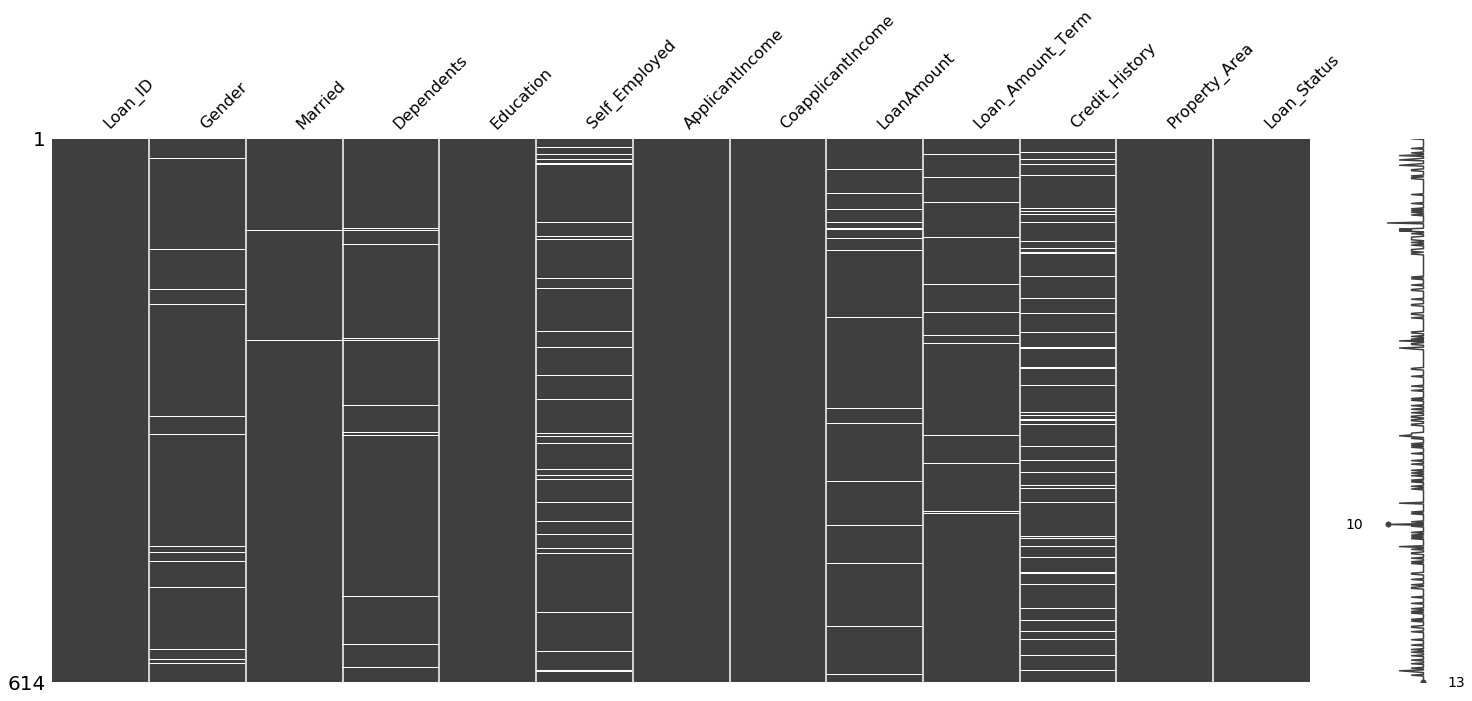

In [6]:
ms.matrix(data)

In [7]:
Gender_df = pd.get_dummies(data['Gender'],drop_first=3)
Gender_df.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [8]:
Married_df = pd.get_dummies(data['Married'],drop_first=3)
Married_df.head()

,Yes
0,0
1,1
2,1
3,1
4,0


In [9]:
Education_df = pd.get_dummies(data['Education'],drop_first=3)
Education_df.head()

,Not Graduate
0,0
1,0
2,0
3,1
4,0


In [10]:
Self_Employed_df = pd.get_dummies(data['Self_Employed'],drop_first=3)
Self_Employed_df.head()

,Yes
0,0
1,0
2,1
3,0
4,0


In [11]:
Property_Area_df = pd.get_dummies(data['Property_Area'],drop_first=3)
Property_Area_df.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [12]:
Loan_Status_df = pd.get_dummies(data['Loan_Status'],drop_first=3)
Loan_Status_df.head()

,Y
0,1
1,0
2,1
3,1
4,1


In [13]:
old_data = data.copy()
data.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,0,5849,0.0,NaN,360.0,1.0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0
2,LP001005,0,3000,0.0,66.0,360.0,1.0
3,LP001006,0,2583,2358.0,120.0,360.0,1.0
4,LP001008,0,6000,0.0,141.0,360.0,1.0


In [14]:
data = pd.concat([data,Gender_df,Married_df,Education_df,Self_Employed_df,Property_Area_df,Loan_Status_df],axis=1)

In [15]:
data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,LP001002,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [16]:
data.columns = ['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender','Married','Education','Self_Employed','Semiurban','Urban','Loan_Status']

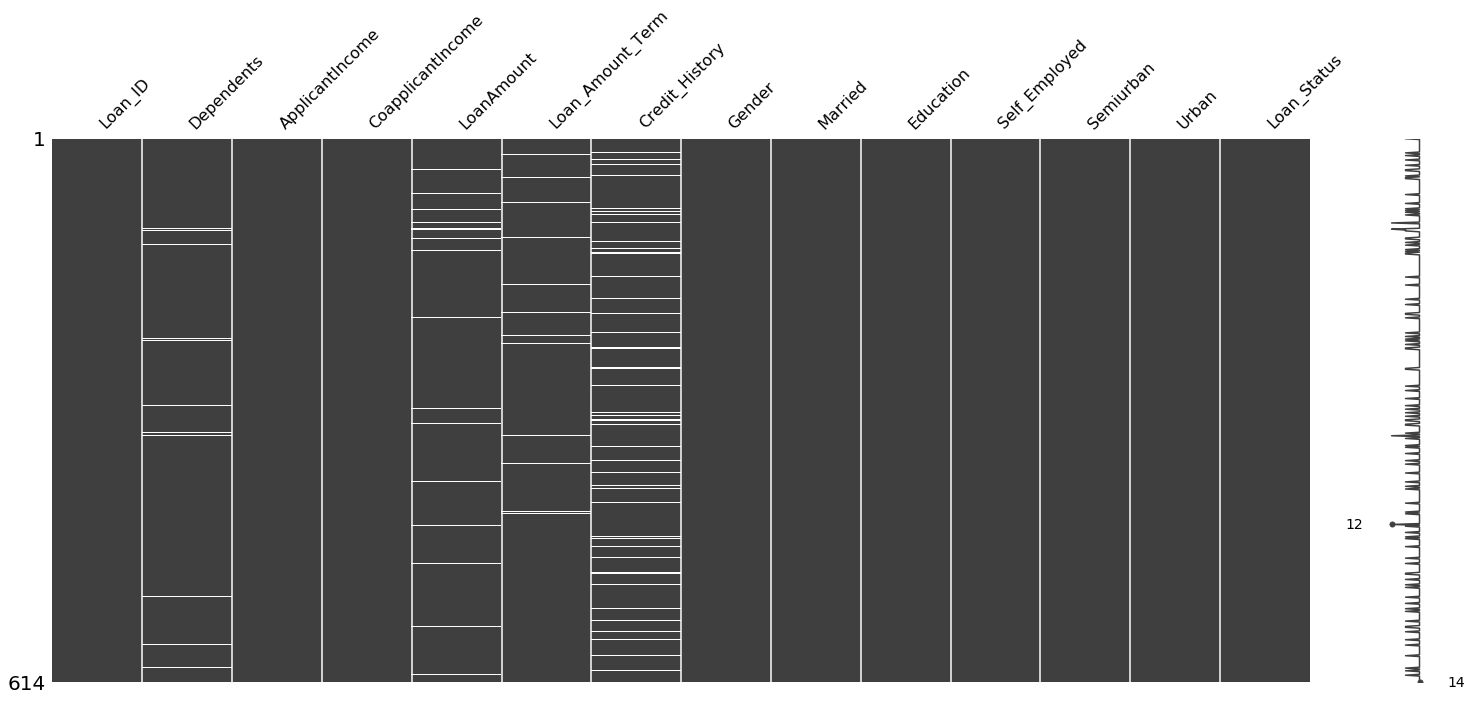

In [17]:
ms.matrix(data)

In [20]:
def impute_Dependents(cols):
    Dependents = cols[0]
    
    if pd.isnull(Dependents):
        return 0

    else:
        return Dependents

In [22]:
data['Dependents'] = data[['Dependents']].apply(impute_Dependents,axis=1)

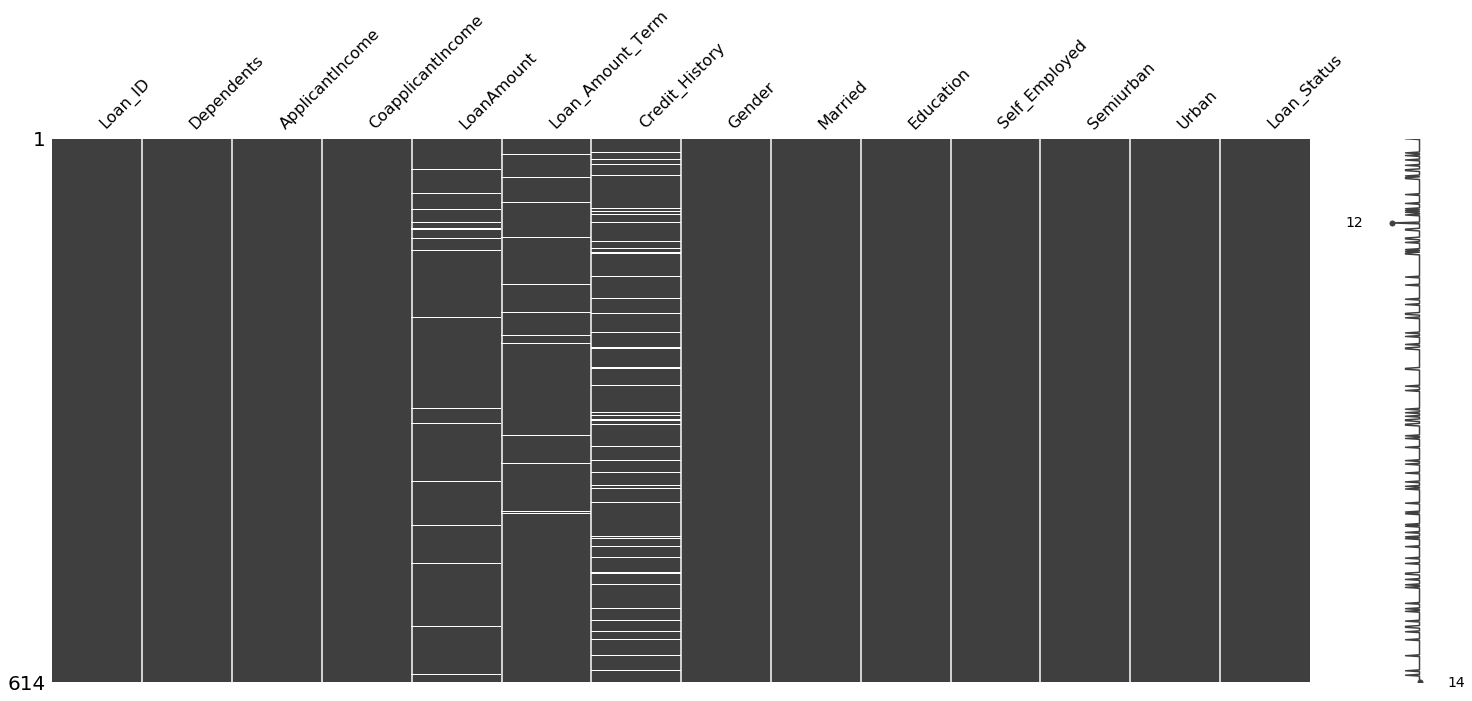

In [23]:
ms.matrix(data)

In [24]:
def impute_Loan_Amount_Term(cols):
    Loan_Amount_Term = cols[0]
    
    if pd.isnull(Loan_Amount_Term):
        return 360.0

    else:
        return Loan_Amount_Term

In [25]:
data['Loan_Amount_Term'] = data[['Loan_Amount_Term']].apply(impute_Loan_Amount_Term,axis=1)

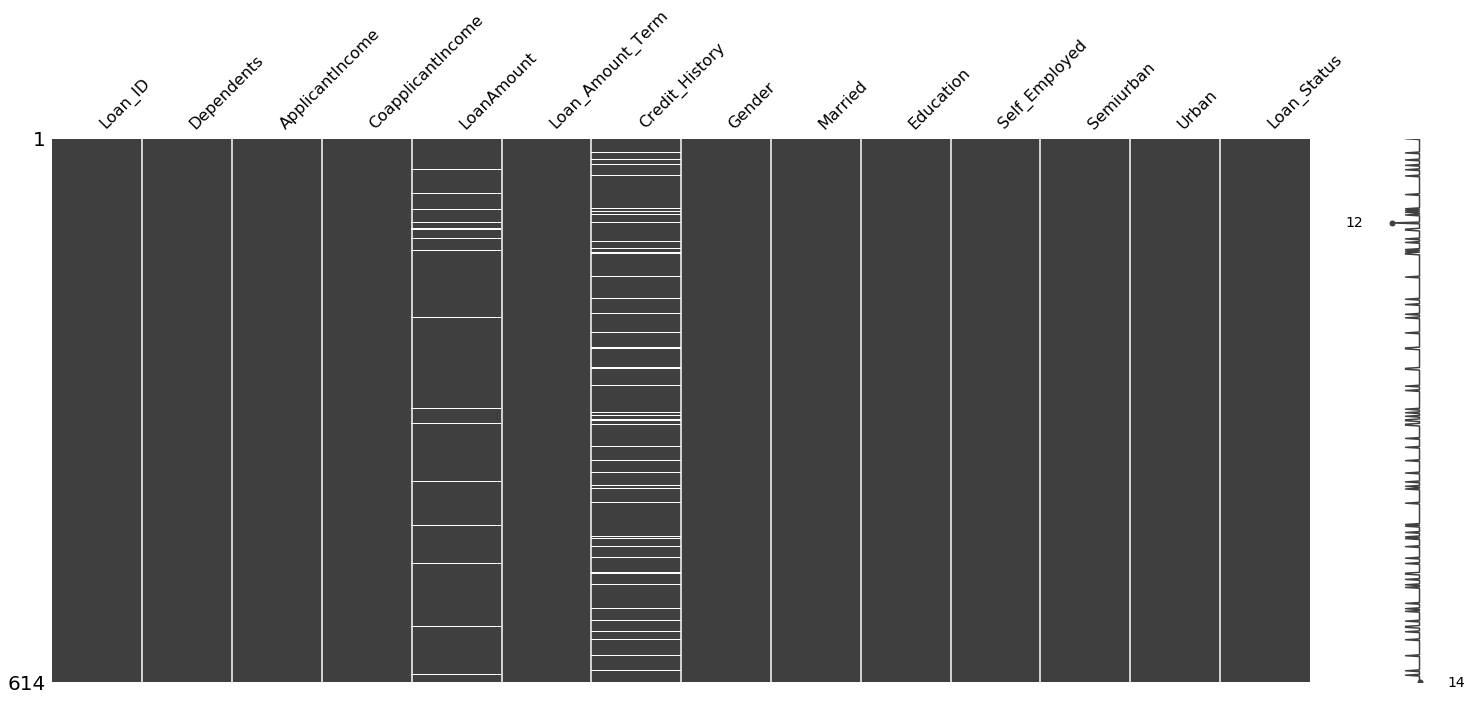

In [26]:
ms.matrix(data)

Text(0.5, 1, 'data.corr()')

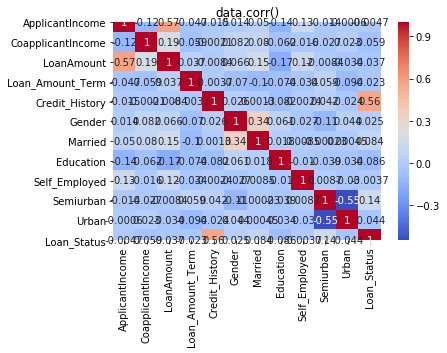

In [27]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True,annot=True)
plt.title('data.corr()')

In [28]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Semiurban,Urban,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.046531,-0.014715,0.013933,0.050194,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059383,-0.002056,0.082316,0.080496,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.036981,-0.008433,0.065501,0.148367,-0.171133,0.117421,-0.008401,-0.034003,-0.037318
Loan_Amount_Term,-0.046531,-0.059383,0.036981,1.000000,-0.003735,-0.070288,-0.103381,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.014715,-0.002056,-0.008433,-0.003735,1.000000,0.026349,0.001259,-0.081822,-0.002362,0.042414,-0.023721,0.561678
Gender,0.013933,0.082316,0.065501,-0.070288,0.026349,1.000000,0.339026,0.061497,-0.027421,-0.113069,0.044109,0.025407
Married,0.050194,0.080496,0.148367,-0.103381,0.001259,0.339026,1.000000,0.017671,0.008491,-0.000229,0.000449,0.084281
Education,-0.140760,-0.062290,-0.171133,-0.073928,-0.081822,0.061497,0.017671,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Self_Employed,0.127180,-0.016100,0.117421,-0.033739,-0.002362,-0.027421,0.008491,-0.010383,1.000000,0.008710,-0.030338,-0.003700
Semiurban,-0.014246,-0.027044,-0.008401,0.059141,0.042414,-0.113069,-0.000229,-0.039410,0.008710,1.000000,-0.547574,0.136540


In [30]:
data.groupby('Self_Employed')['LoanAmount'].median()

Self_Employed
0    125.0
1    150.0
Name: LoanAmount, dtype: float64

In [31]:
def impute_LoanAmount(cols):
    LoanAmount= cols[0]
    Self_Employed= cols[1]
    
    if pd.isnull(LoanAmount):
        # Class-0
        if Self_Employed == 0:
            return 125.0
        else:
            return 150.0

    else:
        return LoanAmount

In [34]:
data['LoanAmount'] = data[['LoanAmount','Self_Employed']].apply(impute_LoanAmount,axis=1)

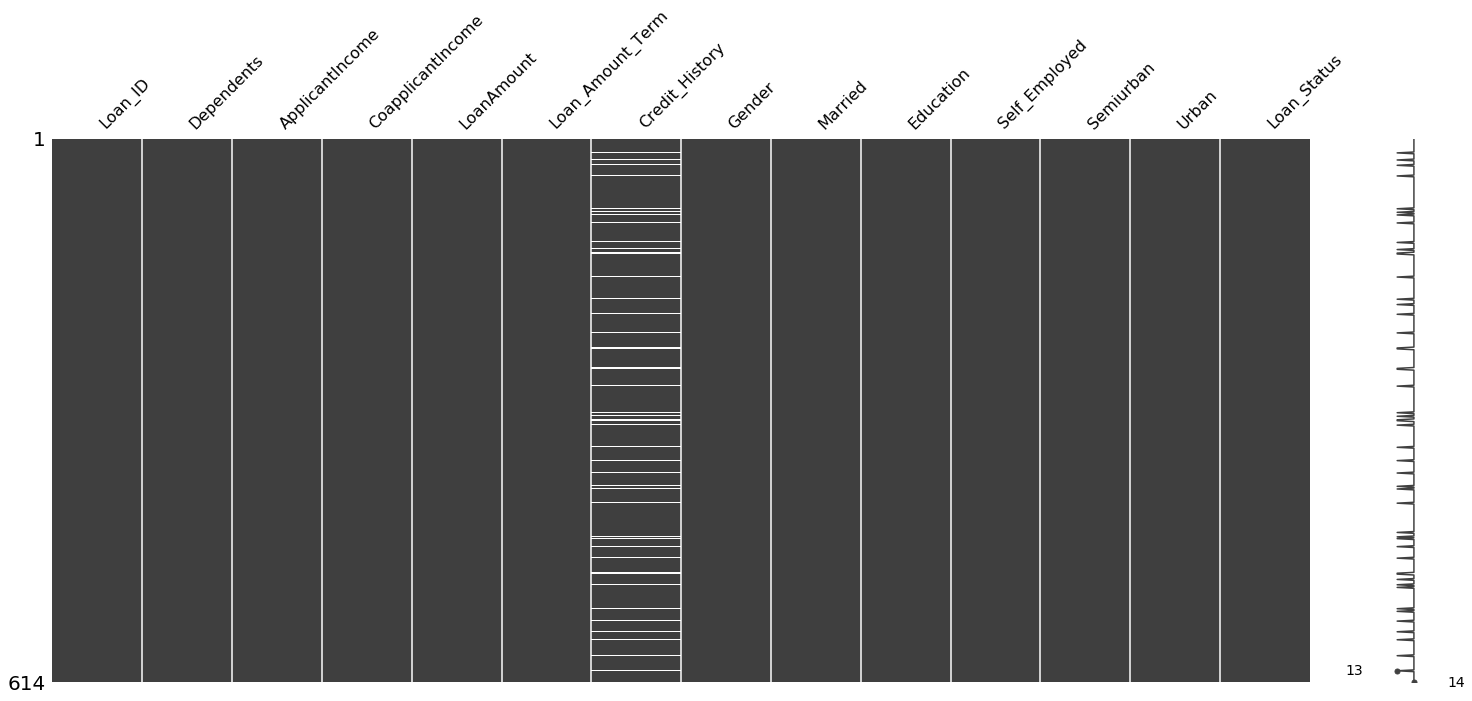

In [35]:
ms.matrix(data)

In [36]:
data.groupby('Loan_Status')['Credit_History'].median()

Loan_Status
0    1.0
1    1.0
Name: Credit_History, dtype: float64

In [37]:
def impute_Credit_History(cols):
    Credit_History = cols[0]
    
    if pd.isnull(Credit_History):
        return 1.0

    else:
        return Credit_History

In [38]:
data['Credit_History'] = data[['Credit_History']].apply(impute_Credit_History,axis=1)

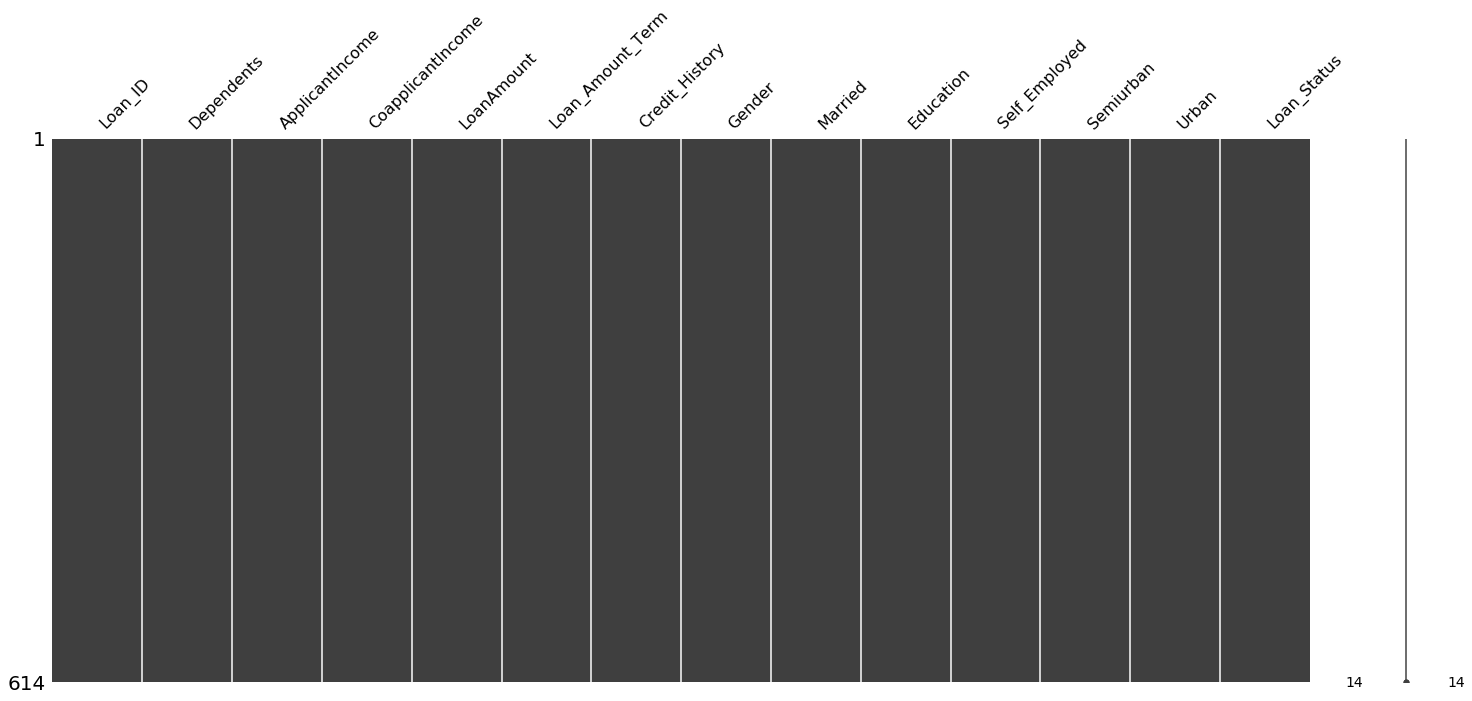

In [39]:
ms.matrix(data)

In [51]:
data.drop(['Dependents'],axis=1,inplace=True)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan_Status',axis=1), 
                                                    data['Loan_Status'], test_size=0.30, 
                                                    random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predicted =  logmodel.predict(X_test)

In [56]:
predicted

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [57]:
from sklearn.metrics import precision_score

print(precision_score(y_test,predicted))

0.7564102564102564


In [58]:
from sklearn.metrics import recall_score

print(recall_score(y_test,predicted))

0.9752066115702479


In [59]:
from sklearn.metrics import f1_score

print(f1_score(y_test,predicted))

0.851985559566787


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185

